## Library Imports

In [14]:
import math
from nltk.corpus import wordnet
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
import itertools

from sklearn.utils import shuffle



## **Import Dataset**

In [4]:
train = pd.read_csv("training.csv")
test = pd.read_csv("testing.csv")

## Seprate Train X and Train Y from training data

In [5]:
trainX = np.array(train['text'])
trainY = np.array(train['label'])
print(train.shape)
train.head()

(1300, 3)


,index,text,label
0,0,وسکانسن (ویب ڈیسک ) قارئین کے لیے یہ بات بہت...,1
1,1,\n\nریو ڈی جنیریو اب ماہرین نے ورزش کی ایک اور...,1
2,2,سعودی عرب نے پاکستان کو مزید مشکل میں ڈال دیا ...,1
3,3,آطف اسلم غصے میں کیا کر بیٹھے\nکراچی گلوکار عا...,1
4,4,\nگاڑی کی ٹکر سے ایک شخص کی ہلاکت پر بھارتی کر...,1


## Seprate Test X and Test Y from test data

In [6]:
testX = np.array(test['text'])
#testY = np.array(train['label'])

## Generate unigram Feature Matrix

In [7]:
vectTrain = CountVectorizer(input='content',decode_error='ignore',analyzer='word', strip_accents='unicode', binary=False, ngram_range=(1,2)).fit(trainX)
X_train_vectorized = vectTrain.transform(trainX).toarray()
X_test_vectorized = vectTrain.transform(testX).toarray()

## Plot Confussion matrix

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
pip install lightgbm



  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.3 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.3 MB 416.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.3 MB 481.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.3 MB 655.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 718.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 737.3 kB/s eta 0:00:02
   ---------- -------------------------

## GBM

In [11]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_vectorized, trainY)

trainPredictiongbm = clf.predict(X_train_vectorized)
testPredictionsgbm = clf.predict(X_test_vectorized)
test['GBM_Result'] = testPredictionsgbm

[LightGBM] [Info] Number of positive: 550, number of negative: 750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15035
[LightGBM] [Info] Number of data points in the train set: 1300, number of used features: 3401
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.423077 -> initscore=-0.310155
[LightGBM] [Info] Start training from score -0.310155


## Training Confusion Matrix

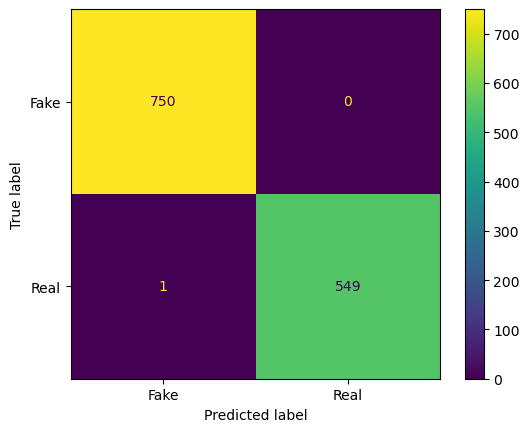

In [15]:
# Assuming trainPredictiongbm contains your model predictions and trainY contains the true labels
conf_mat = confusion_matrix(trainY, trainPredictiongbm)

# Create ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=['Fake', 'Real'])

# Plot confusion matrix
cm_display.plot()

plt.show()

## Testing Confusion Matrix

In [37]:
# cm = confusion_matrix(testPredictionsgbm, testY) 
# print(cm)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Training Accuracy

In [16]:
print ("Precision_Recall_Fscore on Training Data is:",precision_recall_fscore_support(trainY, trainPredictiongbm, average='weighted'))
print ("Overall Accuracy on Training Data is:",metrics.accuracy_score(trainY,trainPredictiongbm))

Precision_Recall_Fscore on Training Data is: (0.9992317935060944, 0.9992307692307693, 0.9992306755016964, None)
Overall Accuracy on Training Data is: 0.9992307692307693


## Testing Accuracy

In [17]:
# print ("Precision_Recall_Fscore on Testing Data is:",precision_recall_fscore_support(testY,testPredictionsgbm, average='weighted'))
# print ("Overall Accuracy on Testing Data is:",metrics.accuracy_score(testY,testPredictionsgbm))

In [18]:
test["Real/Fake"] = np.nan
for i in test.index:
  if test['GBM_Result'][i] == 1:
    test.loc[i, ['Real/Fake']] = 'F'
  elif test['GBM_Result'][i] == 0:
    test.loc[i, ['Real/Fake']] = 'R'

In [19]:
test

,index,text,label,GBM_Result,Real/Fake
0,0,صنعتوں کو جدید خطوط پر استوار کرنے کیلئے اعلیٰ...,NaN,0,R
1,1,افغانستان میں طالبان کے کنٹرول کرنے کے بعد پاک...,NaN,0,R
2,2,ویڈنگ اینتھم مالا بار گولڈ اینڈ ڈائمنڈس کی مہم...,NaN,0,R
3,3,” رمیز راجہ کو آنے سے پہلے کون متنازع بنانے کی...,NaN,0,R
4,4,پلاسٹک کپ انسانی جسم پر انتہائی مضر اثرات مرتب...,NaN,0,R
...,...,...,...,...,...
295,295,سندھ ہائیکورٹ کا دودھ کی زائد قیمتوں،غیر معیار...,NaN,0,R
296,296,”لڑکی نے میرا کالر پکڑا اور نمبر مانگنا شروع ک...,NaN,0,R
297,297,برازیلین ماڈل نے خود سے ہی شادی کر لی لیکن کیو...,NaN,0,R
298,298,جنت مرزا کی ایسی ویڈیو سامنے آگئی کہ سوشل میڈی...,NaN,0,R


## Save Prediction in file

In [23]:
final_result = pd.DataFrame()
final_result = test[["index", "Real/Fake"]]
final_result.to_csv('Lighting_GBM_Final_Result.csv', index=False, encoding="utf-8")


In [21]:
# Print column names in the DataFrame
print(test.columns)

# Check if the column names 'File_No' and 'Real/Fake' are present in the DataFrame
if 'File_No' in test.columns and 'Real/Fake' in test.columns:
    final_result = test[["File_No", "Real/Fake"]]
    final_result.to_csv('Lighting_GBM_Final_Result.csv', index=False, encoding="utf-8")
else:
    print("Column names 'File_No' and/or 'Real/Fake' not found in DataFrame.")


Index(['index', 'text', 'label', 'GBM_Result', 'Real/Fake'], dtype='object')
Column names 'File_No' and/or 'Real/Fake' not found in DataFrame.
